# Bike Sharing Demand Case Study

---
A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**The company wants to know**:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

---
### Objective:
- Build a model for the demand of shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.

---
---

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from sklearn.metrics import r2_score
# For Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. Reading and Understanding The Data
---

In [70]:
bike_df = pd.read_csv('/content/day.csv')
# Check the head of the dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [71]:
# Understanding the meaning of each feature
with open('data_dictionary.txt') as f:
    contents = f.read()
    print(contents)

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

In [72]:
# checking the shape of the dataframe
bike_df.shape

(730, 16)

In [73]:
# Getting basic statistical details of the data frame
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [74]:
# Checking duplicate rows
print("Number of duplicate rows: ", bike_df.duplicated().sum())

Number of duplicate rows:  0


In [75]:
# Checking the null/missing columns
bike_df.isnull().mean().round(4)*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Remove least signifiance columns

In [76]:
#Checking single valued columns
bike_df.nunique().sort_values(ascending=True)

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

Action Taken:
1. "instant" are not required as it is just for unique identification. This column can be dropped due to least significance.

2. 'dteday' column can be drop as we have month, weekday and year data.

2. 'casual' and 'registered' corresponds to the outcome and it is already considered in 'cnt' column which is the traget veriable in our case. So we can safely drop those two columns.

In [77]:
# Removing unnecessary columns
bike_df.drop(["instant",'dteday','casual', 'registered'], axis = 1, inplace = True)
print("DataFrame Shape after removing unnecessary columns: \n", bike_df.shape)

DataFrame Shape after removing unnecessary columns: 
 (730, 12)


In [78]:
#checking the data types
bike_df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [79]:
# let's devide categorical and numerical variables
cat_col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
con_col = ['temp','atemp','hum','windspeed','cnt']

len(cat_col) + len(con_col) == len(bike_df.columns)

True

#### Handle Outliers

In [80]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_outlier_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [81]:
outliers = []
# Outlier detection for continuous variables
for col in cat_col:
    print(f"{col} :  {check_outlier(bike_df, col)}")
    outliers.append(check_outlier(bike_df, col))

print(f"Outliers detected? {np.array(outliers).any()}")

season :  False
yr :  False
mnth :  False
holiday :  True
weekday :  False
workingday :  False
weathersit :  False
Outliers detected? True


The dataset does not contain any notable outliers. The variable "Holiday" can be disregarded as outlier.

#### Evaluated the cleanliness of the dataset:
* Check duplicate records : No duplicate rows
* Check Null/missing value : No null rows across all columns
* Drop least significance columns: instant, dteday, casual and registered
* Check Datatype: All columns are in the correct datatype defined in data dictionary


#### Standradizing the Data

In [82]:
# Checking unique values of each categorical variable
for var in cat_col:
    print("Unique values in {0}  : {1}".format(var, str(bike_df[var].unique())))

Unique values in season  : [1 2 3 4]
Unique values in yr  : [0 1]
Unique values in mnth  : [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in holiday  : [0 1]
Unique values in weekday  : [6 0 1 2 3 4 5]
Unique values in workingday  : [0 1]
Unique values in weathersit  : [2 1 3]


In [83]:
#Re-mapping/Labeling categorical variables which is not a binary veriable(0/1)
bike_df['season'] = bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df['weekday'] = bike_df['weekday'].map({0:'sun',1:'mon',2:'tue', 3:'wed',4:'thu',5:'fri', 6:'sat'})
bike_df['weathersit'] = bike_df['weathersit'].map({1:'clear',2:'misty', 3:'light_snowrain', 4:'heavy_snowrain'})
bike_df['mnth'] = bike_df['mnth'].map({1:'jan',2:'feb',3:'mar', 4:'apr',5:'may',6:'june', 7:'july',8:'aug',9:'sep', 10:'oct',11:'nov',12:'dec'})

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [84]:
# Re-checking unique values of each categorical variable
for var in cat_col:
    print("Unique values in {0}  : {1}".format(var, str(bike_df[var].unique())))

Unique values in season  : ['spring' 'summer' 'fall' 'winter']
Unique values in yr  : [0 1]
Unique values in mnth  : ['jan' 'feb' 'mar' 'apr' 'may' 'june' 'july' 'aug' 'sep' 'oct' 'nov' 'dec']
Unique values in holiday  : [0 1]
Unique values in weekday  : ['sat' 'sun' 'mon' 'tue' 'wed' 'thu' 'fri']
Unique values in workingday  : [0 1]
Unique values in weathersit  : ['misty' 'clear' 'light_snowrain']


## 2. Visualising The Data
---

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

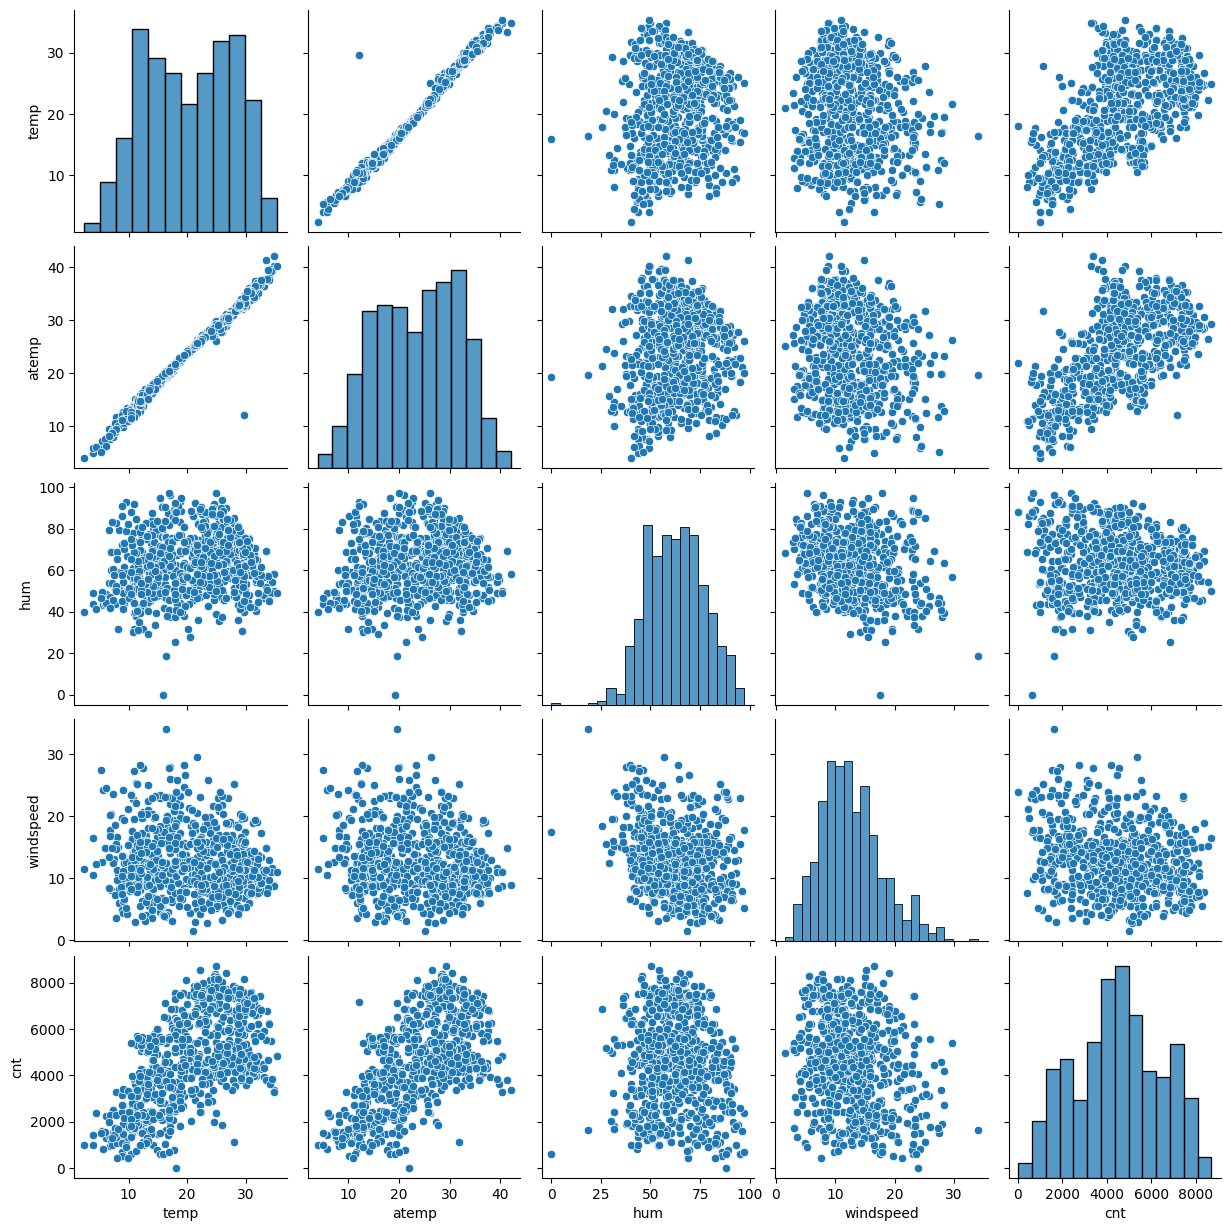

In [85]:
sns.pairplot(bike_df[con_col])
plt.show()

> Observation:
* There is strong connections between count variable and temperature, humidity and windspeed.

#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables.

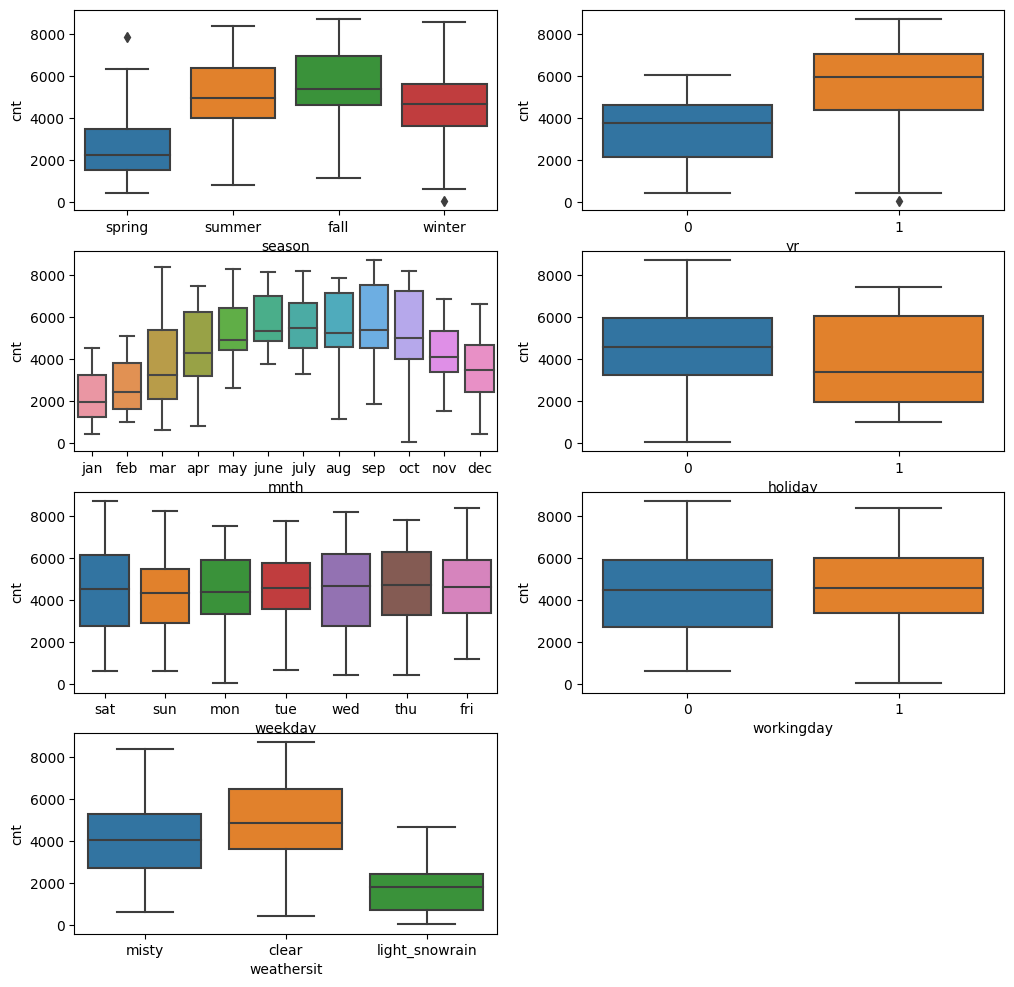

In [86]:
# Set up the figure and subplots
plt.figure(figsize=(12, 12))

# Use a for loop to create subplots
for i, variable in enumerate(cat_col, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=variable, y='cnt', data=bike_df)

plt.show()

> Observations:
1. People are more likely to rent bikes in the fall season and summer
2. Bike rental rates are higher in  Q3 (July to September)
3. Saturday, Wednesday and Thursday are the days where more bikes are rented
4. Most bike rentals take place in the clear weather
5. More bikes were rented in 2019
6. There are no big significance difference in bike rental rates depending on if it's a working day or not
7. Bike rental rates are little bit higher on holidays

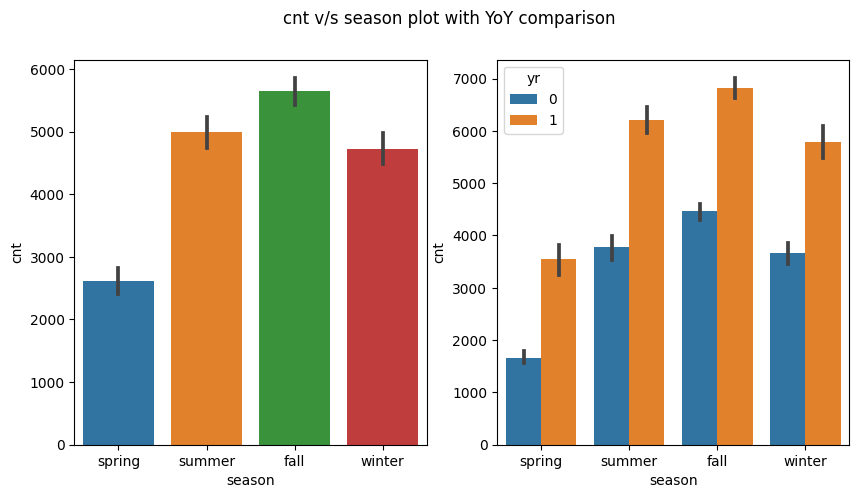

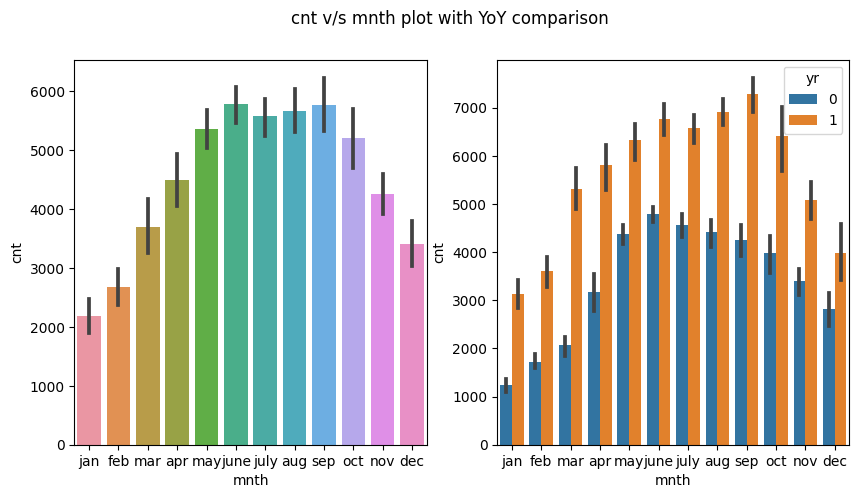

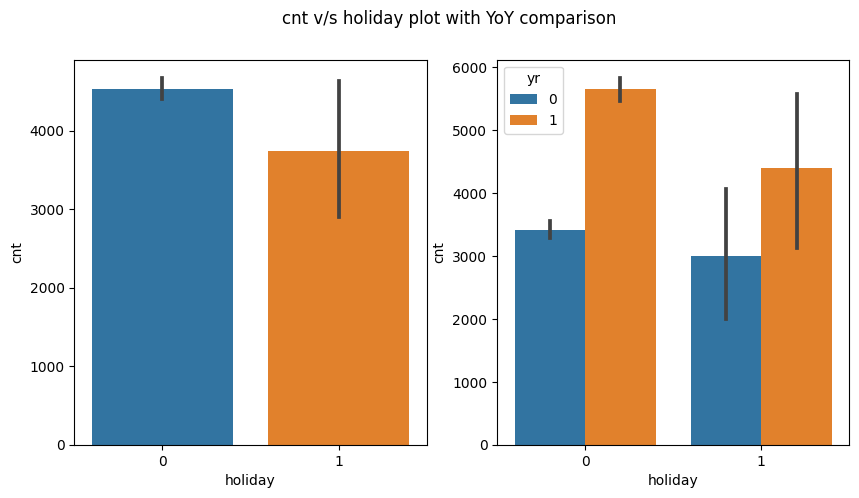

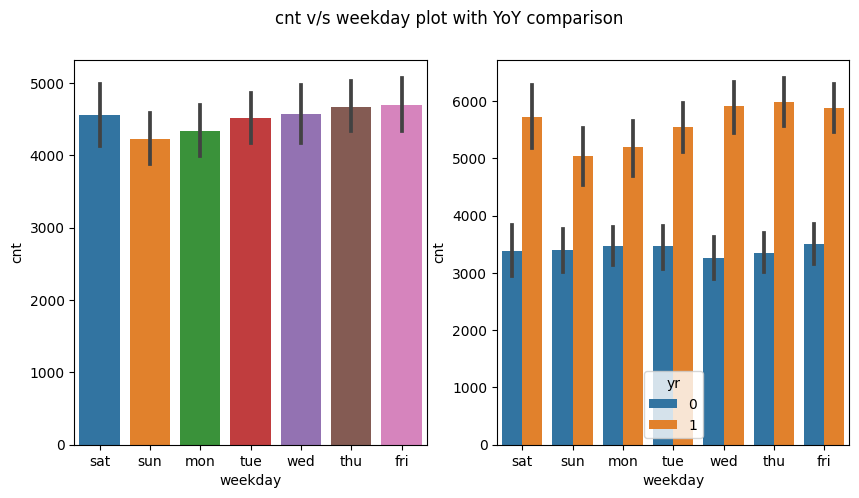

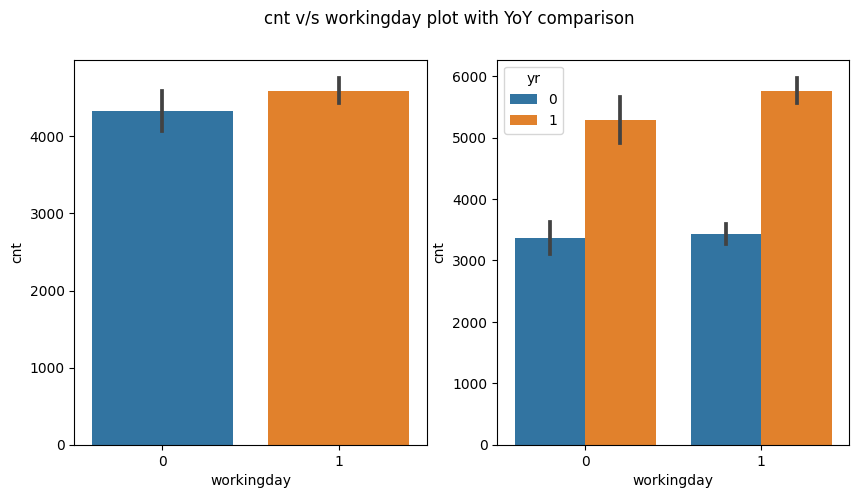

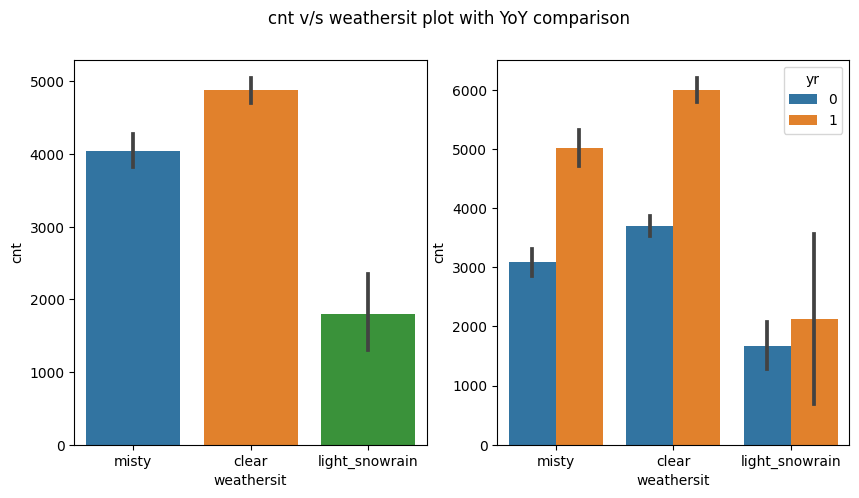

In [87]:
#Bivariate analysis of count with categorical variables with YoY comparison
for column in cat_col:
  if column != "yr":
    plt.figure(figsize=(10, 5))
    plt.suptitle("cnt v/s {} plot with YoY comparison".format(column))
    plt.subplot(1,2,1)
    sns.barplot(data = bike_df, x = column, y = 'cnt')
    plt.subplot(1,2,2)
    sns.barplot(data = bike_df, x = column, y = 'cnt', hue = 'yr')
    print('\n')
    plt.show()

> Observations
* Fall season drew more bookings, with a significant 2018 to 2019 increase in each season.
* Peak bookings: June to September. Upward trend till mid-year, then a decline. Monthly counts rose from 2018 to 2019.
* Clear weather attracted more bookings. Overall 2019 increase for all weather situations compared to 2018.
* Sundays and Mondays had fewer bookings than later in the week.
* Non-holidays had fewer bookings. Count increased from 2018 to 2019.
* Similar bookings on working and non-working days, but a 2018 to 2019 increase.


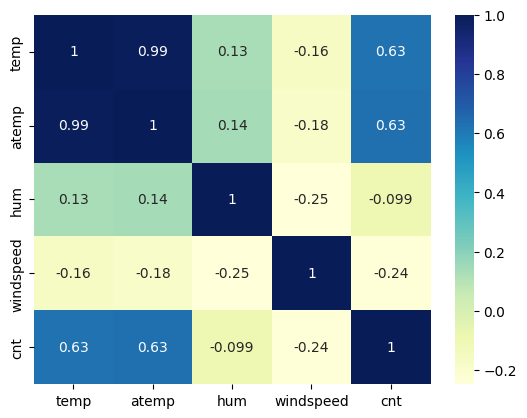

In [88]:
# Checking the correlation between the numerical variables
Corr_matrix = bike_df[con_col].corr()
sns.heatmap(Corr_matrix, annot = True, cmap="YlGnBu")
plt.show()

> Observation:
* "temp" and "atemp" has very high correlation
* Target variable 'cnt' has a good correlation with 'temp' and 'atemp'.

Both 'temp' and 'atemp' can't be used in the model building as it can be the case of multicolinearity and will remove them based on their VIF and P-Value.

## 3. Data Preparation
---

Transform categorical variables to numeric variables
* Transform binary variables to the numeric format (0,1)
* Transform multi-value categorical variables with Dummy variable

Let's create dummies for all the categorical variables except 0/1 variables ('yr', 'holiday', 'workingday')

In [89]:
# Dummy variable creation for month, weekday, weathersit and season variables.
months_dm=pd.get_dummies(bike_df.mnth,drop_first=True)
weekdays_dm=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_dm=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons_dm=pd.get_dummies(bike_df.season,drop_first=True)

In [90]:
bike_df = pd.concat([bike_df,months_dm,weekdays_dm,weathersit_dm,seasons_dm],axis=1)

# dropping unnecessary columns as we have already created dummy variable out of it.

bike_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [91]:
print("Shape of dataframe after dummy variable creation : ",bike_df.shape,)
bike_df.info()

Shape of dataframe after dummy variable creation :  (730, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             73

## 4. Splitting The Data into Training and Testing Sets
---

The first step for regression is performing a train-test split.

In [92]:
# Split data to train-test subset
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [93]:
print("Shape of train set : ", bike_df_train.shape)
print("Shape of test set : ", bike_df_test.shape)

Shape of train set :  (510, 30)
Shape of test set :  (219, 30)


Rescaling the train set by Min-Max scaling


In [94]:
# let's scale the training data
scaler = MinMaxScaler()

# Applying the min-max scaler on the continuous data
bike_df_train[con_col] = scaler.fit_transform(bike_df_train[con_col])

In [95]:
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


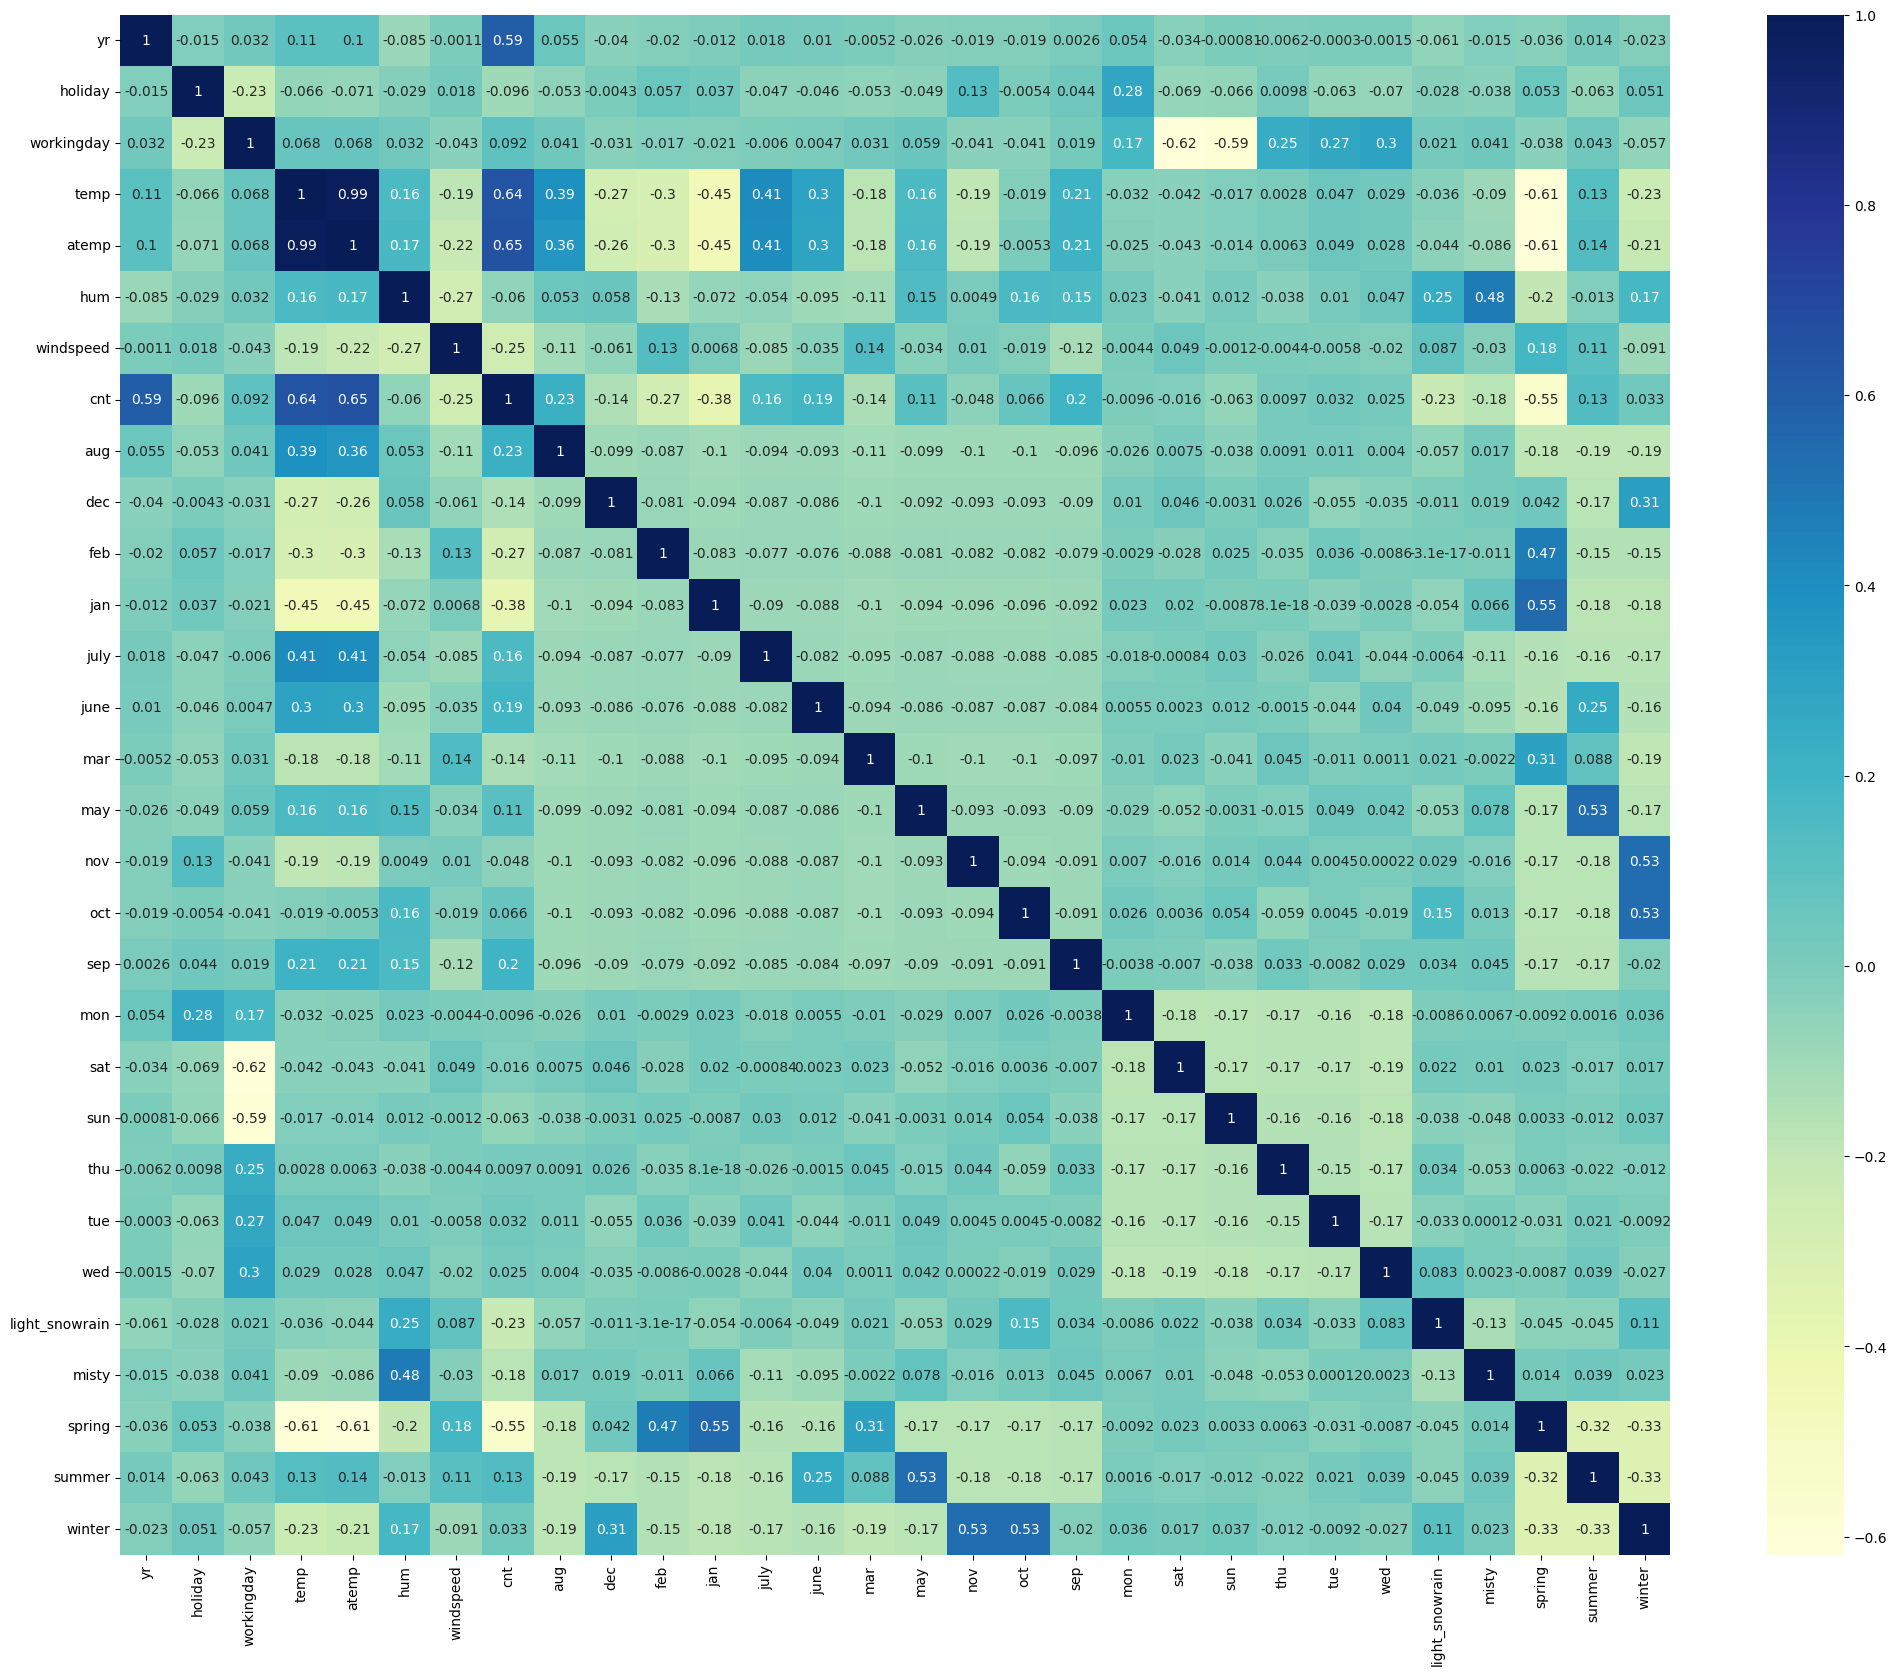

In [96]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,20))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

* "Cnt" correlates with the "year" and "temp" variables.

* "Misty" correlates with "humidity."

* "Spring" correlates with "Jan" and "Feb," "Summer" with "May," and "Winter" with "Oct" and "Nov."

## 5. Building a Linear Model
---


There are multiple approaches to build a model.

1. Begin with one variable and keep adding the features.
2. Begin with all the variables and keep removing the features.
3. Use RFE to find the top 'n' features, and manually select the features to build the model.

Let's use RFE approach for solving the problem.

In [97]:
# Dividing into X and Y sets for the model building
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

Performing Automatic Feature selection using RFE

In [98]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [99]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 3),
 ('feb', False, 5),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 15),
 ('mar', False, 14),
 ('may', False, 7),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 13),
 ('light_snowrain', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', True, 1)]

In [100]:
# selecting RFE support cols
rfe_support_cols = X_train.columns[rfe.support_]
rfe_support_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'sun', 'light_snowrain', 'misty', 'spring',
       'winter'],
      dtype='object')

In [101]:
# Checking rejected columns by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [102]:
# Crreate a function for build a linear model, display the summary, and calculate VIF values

def build_model_and_stats_and_vif(X_train, y_train):

    # Adding a constant variable
    X_train_sm = sm.add_constant(X_train)
    # Running the linear model
    lm = sm.OLS(y_train, X_train_sm).fit()
    #Let's see the summary of our linear model
    print(lm.summary())

    # Calculate the VIFs for the model
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print('\n-----Features vs	VIF Summary----\n')
    print(vif)

    return lm

#### Model 1

In [103]:
# Creating X_test_original dataframe with RFE selected variables
X_train_original = X_train[rfe_support_cols]

# Create a model
lm_1 = build_model_and_stats_and_vif(X_train_original, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.03e-190
Time:                        16:48:49   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2503      0.025      9.

From p-statistics (significance of the feature) and VIF (denoting multicollinearity), we can eliminate further features based on the below approach.

| p-statistics | VIF | Action |
|:-------------|:-----|:------|
| High | High  | Drop |
| Low | High | Remove these features first |
| High | Low | Remove these after handling the above states|
| Low | Low | Use |

We generally want a VIF that is less than 5 and p-value less than 0.05. So there are clearly some variables we need to drop.



Workingday has very high VIF. Let's remove this

#### Model 2

In [104]:
# Drop 'workingday' based on the previous inference
X_train = X_train_original.drop(['workingday'], axis=1)

# Create a model
lm_2 = build_model_and_stats_and_vif(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.03e-190
Time:                        16:48:49   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3468      0.031     11.

#### Model 3

In [105]:
# Drop 'hum' based on the previous inference
X_train = X_train_original.drop(['workingday','hum'], axis=1)

# Create a model
lm_3 = build_model_and_stats_and_vif(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.12e-188
Time:                        16:48:49   Log-Likelihood:                 506.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     496   BIC:                            -926.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2717      0.024     11.

#### Model 4

In [106]:
# Drop 'sat' based on the previous inference
X_train = X_train_original.drop(['workingday','hum','sat'], axis=1)

# Create a model
lm_4 = build_model_and_stats_and_vif(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     218.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.50e-189
Time:                        16:48:49   Log-Likelihood:                 506.36
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     497   BIC:                            -931.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2739      0.024     11.

#### Model 5

In [107]:
# Drop 'nov' based on the previous inference
X_train = X_train_original.drop(['workingday','hum','sat','winter'], axis=1)

# Create a model
lm_6 = build_model_and_stats_and_vif(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.75e-187
Time:                        16:48:49   Log-Likelihood:                 499.50
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     498   BIC:                            -924.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3296      0.019     17.

#### Model 6

In [108]:
# Drop 'jan' based on the previous inference
X_train = X_train_original.drop(['workingday','hum','sat','winter' ,'jan'], axis=1)

# Create a model
lm_6 = build_model_and_stats_and_vif(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          8.22e-187
Time:                        16:48:49   Log-Likelihood:                 495.05
No. Observations:                 510   AIC:                            -968.1
Df Residuals:                     499   BIC:                            -921.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3185      0.019     16.

####Model 7

In [109]:
# Drop 'july' based on the previous inference
X_train = X_train_original.drop(['workingday','hum','sat','winter' ,'jan', 'july'], axis=1)

# Create a model
lm_7 = build_model_and_stats_and_vif(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     266.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.75e-184
Time:                        16:48:49   Log-Likelihood:                 486.66
No. Observations:                 510   AIC:                            -953.3
Df Residuals:                     500   BIC:                            -911.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3345      0.019     17.

#### Model 8

In [110]:
# Drop 'sun' based on the previous inference
X_train = X_train_original.drop(['workingday','hum','sat','winter' ,'jan', 'july', 'sun'], axis=1)

# Create a model
lm_8 = build_model_and_stats_and_vif(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     289.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          2.26e-182
Time:                        16:48:49   Log-Likelihood:                 478.75
No. Observations:                 510   AIC:                            -939.5
Df Residuals:                     501   BIC:                            -901.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3248      0.019     17.

The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using the model 8.

In [111]:
lm_8.params

const             0.324777
yr                0.236568
holiday          -0.090741
temp              0.344510
windspeed        -0.147467
sep               0.068883
light_snowrain   -0.280275
misty            -0.079491
spring           -0.151320
dtype: float64

In [112]:
# Final predictors
final_model_predictors = ['yr', 'holiday', 'temp', 'windspeed', 'sep', 'light_snowrain', 'misty', 'spring']

In [113]:
# Create a final model object for Linear regression model
final_model = LinearRegression()
# Select the training data belonging to final predictors
X_train = bike_df_train[final_model_predictors]
# Create the model
final_model.fit(X_train, y_train)
print("Intercept    : ", final_model.intercept_)
print("Coefficients : ", final_model.coef_)

Intercept    :  0.3247772877628703
Coefficients :  [ 0.23656819 -0.09074104  0.34450992 -0.14746685  0.06888326 -0.2802754
 -0.07949125 -0.15132024]


## 6. Residual Analysis of The Train Data
---


Let's check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

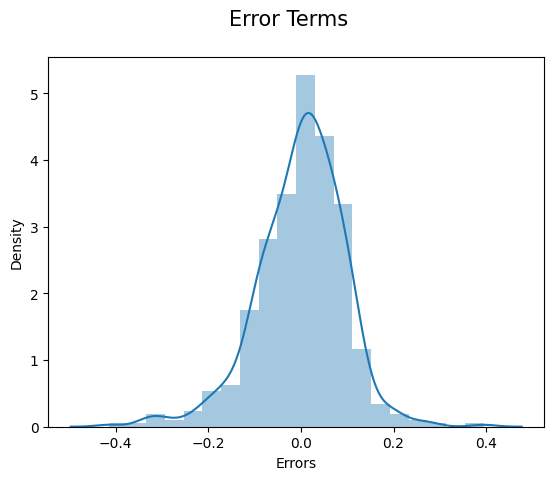

In [114]:
# Predict the output based on the final selected model
y_train_pred = final_model.predict(X_train)

# Calculate the residual error
res_error_train = y_train - y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res_error_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Errors', fontsize = 10)

> The residual errors is almost normally distributed with a mean 0

## 7. Making Predictions using The Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [115]:
# Scaling the test dataset using min-max scaler
cont_vars = ['temp','atemp','hum','windspeed','cnt']
bike_df_test[cont_vars] = scaler.transform(bike_df_test[cont_vars])
bike_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [116]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [117]:
# Select only the best predictors in test data set
X_test = X_test[X_train.columns]

# Sample the dataset
X_test.head()

,yr,holiday,temp,windspeed,sep,light_snowrain,misty,spring
184,0,1,0.831783,0.084219,0,0,1,0
535,1,0,0.901354,0.153728,0,0,0,0
299,0,0,0.511964,0.334206,0,0,1,0
221,0,0,0.881625,0.339570,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0


Residual error mean for test data set:  0.0051584644652445


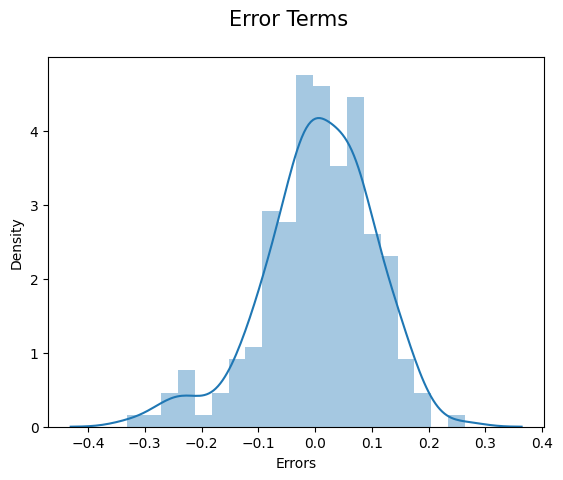

In [118]:
# Predict the test data values using the best model
y_test_pred = final_model.predict(X_test)

# Residual error for test data set
res_error_test = y_test - y_test_pred

# Plot the residual error
fig = plt.figure()
sns.distplot(res_error_test, bins = 20)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Errors', fontsize = 10)

# Print the residual error mean
print("Residual error mean for test data set: ", res_error_test.mean())

## 8. Model Evaluation
---

Let's plot the graph for actual versus predicted values.

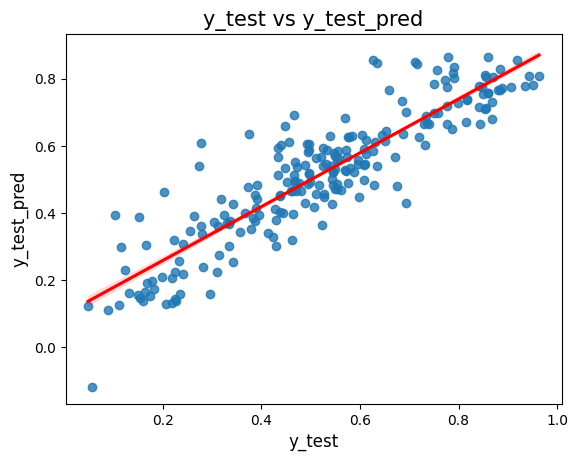

In [119]:
# Visualizing the fit on the test data using Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=15)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_test_pred', fontsize=12)
plt.show()

In [120]:
# Calculating Rsquare for train set
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.8220836072988934

In [121]:
# Calculating Rsquare for test set
r2_test = r2_score(y_test, y_test_pred)
r2_test

0.8001733035896085


> The R2 score for the test data is 0.80, while for the training data, it's 0.82. The slight difference of 0.02 is fine. This means the model didn't just remember the training data; it has generalized learning.

In [122]:
# Calculate adjusted R-squared for train set
num_predictors = X_train.shape[1] - 1  # Exclude the constant term
num_samples = X_train.shape[0]
adjusted_r_squared_train = 1 - (1 - r2_train) * ((num_samples - 1) / (num_samples - num_predictors - 1))
adjusted_r_squared_train

0.8196027014245753

In [123]:
# Calculate adjusted R-squared for test set
num_predictors = X_test.shape[1] - 1  # Exclude the constant term
num_samples = X_test.shape[0]
adjusted_r_squared_test = 1 - (1 - r2_test) * ((num_samples - 1) / (num_samples - num_predictors - 1))
adjusted_r_squared_test

0.7935439819077471

## 9. Summary & Key Takeways
---

In [124]:
print("Train data set Rsquare: ", f"{r2_train:.3f}" )
print("Train data set Adjusted Rsquare: ", f"{adjusted_r_squared_train:.3f}")
print("Test data set Rsquare : ", f"{r2_test:.3f}")
print("Test data set Adjusted Rsquare: ", f"{adjusted_r_squared_test:.3f}")
print("-------------------------------------------------------")
print("Intercept    : ", final_model.intercept_)
print("Coefficients : ", final_model.coef_)
print("-------------------------------------------------------")
print("Demand of bikes depend on features : ", final_model_predictors)

Train data set Rsquare:  0.822
Train data set Adjusted Rsquare:  0.820
Test data set Rsquare :  0.800
Test data set Adjusted Rsquare:  0.794
-------------------------------------------------------
Intercept    :  0.3247772877628703
Coefficients :  [ 0.23656819 -0.09074104  0.34450992 -0.14746685  0.06888326 -0.2802754
 -0.07949125 -0.15132024]
-------------------------------------------------------
Demand of bikes depend on features :  ['yr', 'holiday', 'temp', 'windspeed', 'sep', 'light_snowrain', 'misty', 'spring']


Below is the model equation:
                 
$ \text{cnt} = 0.324777 + (0.236568 \times \text{yr}) - (0.090741 \times \text{holiday}) + (0.344510 \times \text{temp}) - (0.147467 \times \text{windspeed}) + (0.068883 \times \text{sep}) - (0.280275 \times \text{light_snowrain}) - (0.079491 \times \text{misty}) - (0.151320 \times \text{spring}) $



> Analysis Takeaways on Bike Demand:
1. **Temperature Impact:** When it's hot, expect more bike demand.
Action: Prepare for high demand in hot weather.
2. **Yearly Trend:** Demand increases YoY.
Action: Stay focused on business sustainability.
3. **September Spike:** Demand rises around September.
Action: Be ready to manage increased demands in September.
4. **Holiday Downturn:** Demand decreases during holidays.
Action: Promote offers or events to boost usage during holidays.
5. **Seasonal and Weather Impact:** Decrease during spring and bad weather. Action: Prepare for higher demand later by servicing bikes and docks.